## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
white_wine=pd.read_csv('winequality-white.csv',sep=';')
red_wine=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#create new attribute as wine type
white_wine['wine_type']='white'
red_wine['wine_type']='red'

In [6]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
#create quality label
white_wine['quality_label']=white_wine['quality'].apply(lambda value:'low' 
                                                            if value <=5 else 'medium' 
                                                                if value <=7 else 'high')
red_wine['quality_label']=red_wine['quality'].apply(lambda value:'low' 
                                                        if value <=5 else 'medium' 
                                                            if value <=7 else 'high')

In [8]:
#convert quality label column in category
white_wine['quality_label']=pd.Categorical(white_wine['quality_label'],categories=['low','medium','high'])
red_wine['quality_label']=pd.Categorical(red_wine['quality_label'],categories=['low','medium','high'])

In [9]:
#merge both dataset
wines=pd.concat([white_wine,red_wine])

In [10]:
#resuffle data to randomize
wines=wines.sample(frac=1,random_state=33).reset_index(drop=True)

In [11]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.6,0.41,0.14,3.0,0.087,21.0,43.0,0.99640,3.32,0.57,10.5,6,red,medium
1,7.0,0.32,0.27,7.1,0.027,37.0,122.0,0.99165,3.15,0.60,12.6,7,white,medium
2,6.3,0.18,0.22,5.6,0.047,45.0,147.0,0.99383,3.09,0.54,10.0,5,white,low
3,6.8,0.18,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white,medium
4,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5,red,low


In [13]:
wines.shape

(6497, 14)

## EDA
##### Descriptive Stats

In [22]:
subset_attributes=['residual sugar','total sulfur dioxide','sulphates','alcohol','volatile acidity','quality']
rs=round(red_wine[subset_attributes].describe(),2)
ws=round(white_wine[subset_attributes].describe(),2)
pd.concat([rs,ws],axis=1,keys=['Red wine stats','White wine stats'])

Red wine stats                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        1599.00              1599.00   1599.00  1599.00          1599.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.90      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

               White wine stats                                          \
       quality   residual sugar total sulfur dioxide sulphates  alcohol   
count  1599.00          4898.00              4898.00   4898.00  4898.00   
mean      5.64             6.39               138.36      0.49    10.51   
std       0.81             5.07                42.50      0.11     1.23   
min       3.00             0.60                 9.00      0.22     8.00   
25%       5.00             1.70               108.00      0.41     9.50   
50%       6.00             5.20               134.00      0.47    10.40   
75%       6.00             9.90               167.00      0.55    11.40   
max       8.00            65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          4898.00  4898.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

In [24]:
subset_attributes=['alcohol','volatile acidity','pH','quality']
ls=round(wines[wines['quality_label']=='low'][subset_attributes].describe(),2)
ms=round(wines[wines['quality_label']=='medium'][subset_attributes].describe(),2)
hs=round(wines[wines['quality_label']=='high'][subset_attributes].describe(),2)

pd.concat([ls,ms,hs],axis=1,keys=['Low quality wine','Medium quality wine','High quality wine'])

Low quality wine                                    Medium quality wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High quality wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

## Univariate Analysis

#### Visualizing one dimension

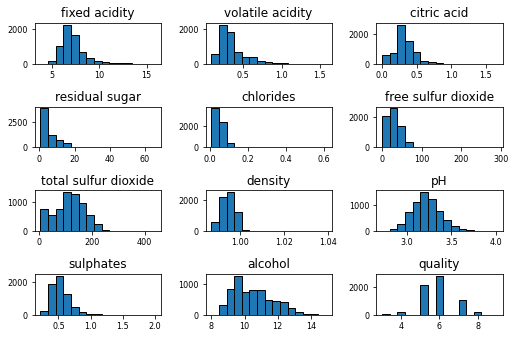

In [29]:
wines.hist(bins=15,edgecolor='black',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

#### Continuous, numeric attribute in 1-D

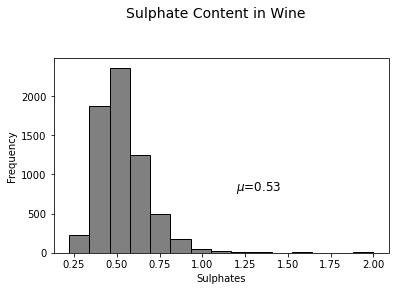

In [32]:
fig=plt.figure(figsize=(6,4))
title=fig.suptitle('Sulphate Content in Wine',fontsize=14)
fig.subplots_adjust(top=0.8,wspace=0.3)

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Sulphates')
ax.set_ylabel('Frequency')
ax.text(1.2,800,r'$\mu$='+str(round(wines['sulphates'].mean(),2)),fontsize=12)

freq, bins, patches = ax.hist(wines['sulphates'],bins=15,linewidth=1,edgecolor='black',color='grey')

<AxesSubplot:xlabel='Sulphates', ylabel='Density'>

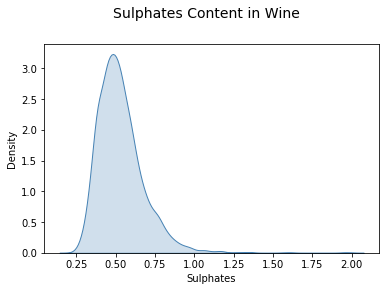

In [34]:
fig=plt.figure(figsize=(6,4))
title=fig.suptitle('Sulphates Content in Wine', fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Sulphates')
ax1.set_ylabel('Density')
sns.kdeplot(wines['sulphates'],ax=ax1, shade=True, color='steelblue')

#### Discrete, categorical attribute in 1-D

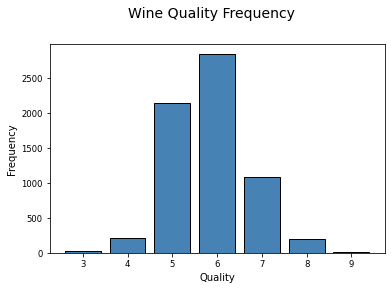

In [35]:
fig=plt.figure(figsize=(6,4))
title=fig.suptitle('Wine Quality Frequency',fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')
w_q=wines['quality'].value_counts()
w_q=(list(w_q.index),list(w_q.values))

ax.tick_params(axis='both',which='major',labelsize=8.5)

bar=ax.bar(w_q[0],w_q[1],color='steelblue',edgecolor='black',linewidth=1)

## Multivariate Analysis
#### Visualising two dimensions

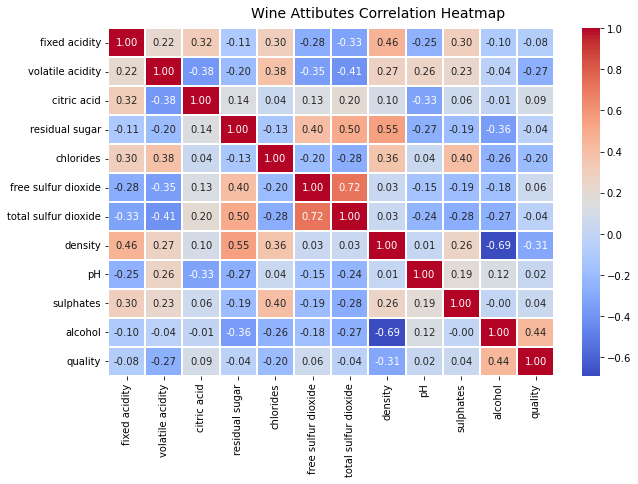

In [37]:
f, ax = plt.subplots(figsize=(10,6))
corr=wines.corr()

hm=sns.heatmap(round(corr,2),annot=True,ax=ax,cmap='coolwarm',fmt='.2f',linewidths=0.05)
f.subplots_adjust(top=0.93)

t=f.suptitle('Wine Attibutes Correlation Heatmap',fontsize=14)

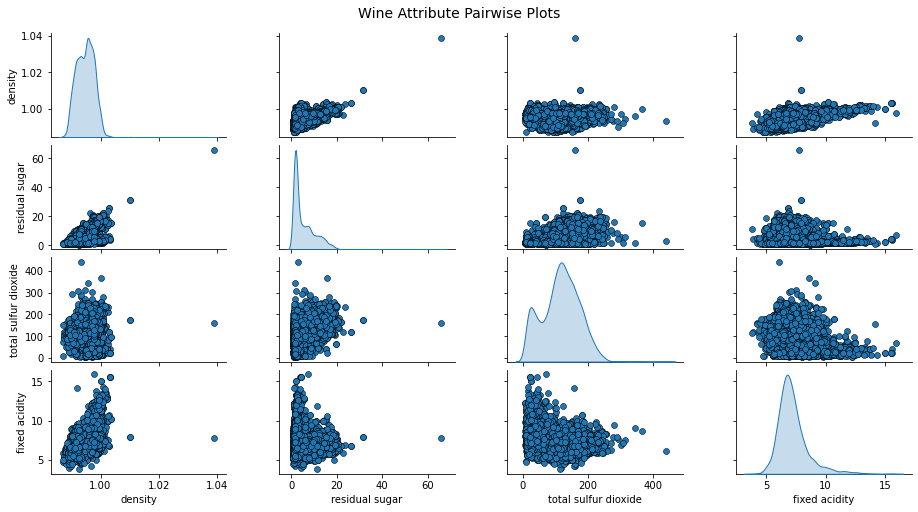

In [49]:
cols=['density','residual sugar','total sulfur dioxide','fixed acidity']

pp=sns.pairplot(wines[cols],size=1.8,aspect=1.8,
               plot_kws=dict(edgecolor='k',linewidth=0.5),
               diag_kind='kde',diag_kws=dict(shade=True))

fig=pp.fig
fig.subplots_adjust(top=0.93,wspace=0.3)
t=fig.suptitle('Wine Attribute Pairwise Plots',fontsize=14)

In [40]:
cols=['density','residual sugar','total sulfur dioxide','fixed acidity']
subset_df=wines[cols]

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
scaled_df=ss.fit_transform(subset_df)
scaled_df=pd.DataFrame(scaled_df,columns=cols)
final_df=pd.concat([scaled_df,wines['wine_type']],axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,fixed acidity,wine_type
0,0.568084,-0.513561,-1.287116,0.296754,red
1,-1.016072,0.348247,0.110681,-0.166089,white
2,-0.289028,0.032951,0.553022,-0.706073,white
3,1.128375,1.546371,0.977669,-0.320370,white
4,-0.432436,-0.807837,-0.349353,-1.708901,red


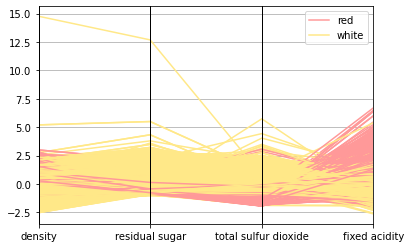

In [43]:
from pandas.plotting import parallel_coordinates

pc=parallel_coordinates(final_df,'wine_type',color=('#FF9999','#FFE888'))

#### Two continuous Numeric attributes

Text(0.5, 1.05, 'Wine Sulphates - Alcohol Content')

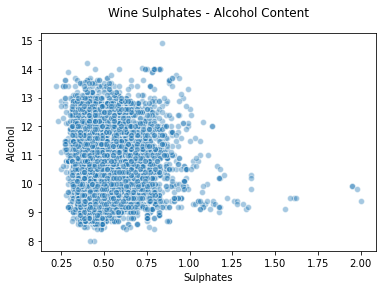

In [45]:
plt.scatter(wines['sulphates'],wines['alcohol'],alpha=0.4,edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)

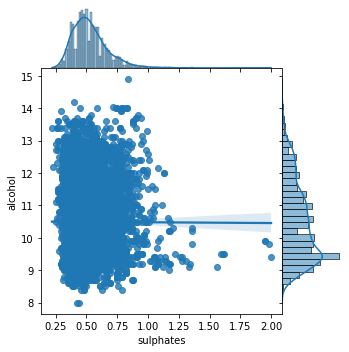

In [50]:
jp=sns.jointplot(x='sulphates',y='alcohol',data=wines,kind='reg',space=0,size=5,ratio=4)

#### Two Discrete Categorical attributes

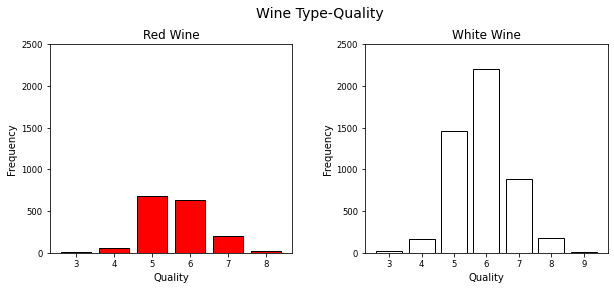

In [59]:
fig=plt.figure(figsize=(10,4))
fig.suptitle('Wine Type-Quality',fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax1=fig.add_subplot(1,2,1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency')

rw_q=red_wine['quality'].value_counts()
rw_q=(list(rw_q.index),list(rw_q.values))

ax1.set_ylim([0,2500])
ax1.tick_params(axis='both',which='major',labelsize=8.5)
bar1=ax1.bar(rw_q[0],rw_q[1],color='red',edgecolor='black',linewidth=1)

ax2=fig.add_subplot(1,2,2)
ax2.set_title('White Wine')
ax2.set_xlabel('Quality')
ax2.set_ylabel('Frequency')

ww_q=white_wine['quality'].value_counts()
ww_q=(list(ww_q.index),list(ww_q.values))

ax2.set_ylim([0,2500])
ax2.tick_params(axis='both',which='major',labelsize=8.5)
bar2=ax2.bar(ww_q[0],ww_q[1],color='white',edgecolor='black',linewidth=1)

<AxesSubplot:xlabel='quality', ylabel='count'>

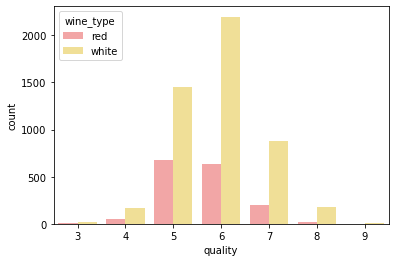

In [60]:
sns.countplot(x='quality',hue='wine_type',data=wines,palette={'red':'#FF9999','white':'#FFE888'})

#### Mixed attributes (Numeric & Categorical)

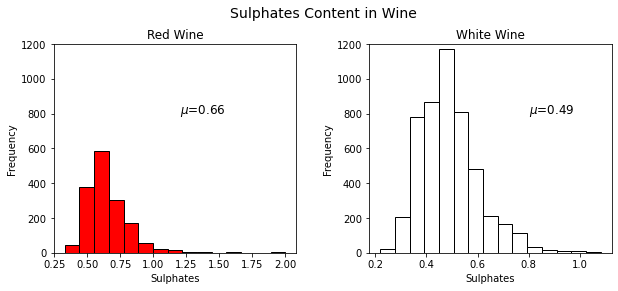

In [61]:
fig =plt.figure(figsize=(10,4))
title=fig.suptitle('Sulphates Content in Wine',fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax1=fig.add_subplot(1,2,1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Sulphates')
ax1.set_ylabel('Frequency')
ax1.set_ylim([0,1200])
ax1.text(1.2,800,r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)),
        fontsize=12)

r_freq, r_bins, r_patches=ax1.hist(red_wine['sulphates'],color='red',bins=15,edgecolor='black',linewidth=1)

ax2=fig.add_subplot(1,2,2)
ax2.set_title('White Wine')
ax2.set_xlabel('Sulphates')
ax2.set_ylabel('Frequency')
ax2.set_ylim([0,1200])
ax2.text(0.8,800,r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)),
        fontsize=12)

w_freq, w_bins, w_patches=ax2.hist(white_wine['sulphates'],color='white',bins=15,edgecolor='black',linewidth=1)

<AxesSubplot:title={'center':'White Wine'}, xlabel='White Wine', ylabel='Density'>

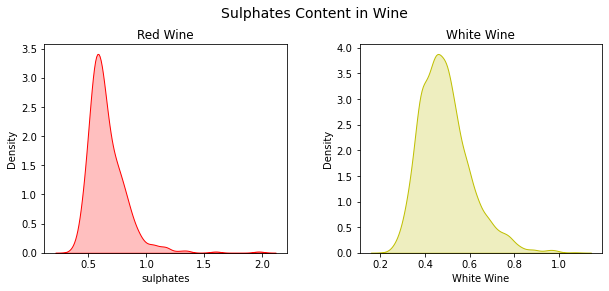

In [63]:
fig=plt.figure(figsize=(10,4))
title=fig.suptitle('Sulphates Content in Wine',fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax1=fig.add_subplot(1,2,1)
ax1.set_title('Red Wine')
ax1.set_label('Sulphates')
ax1.set_ylabel('Density')
sns.kdeplot(red_wine['sulphates'],ax=ax1,shade=True,color='r')

ax2=fig.add_subplot(1,2,2)
ax2.set_title('White Wine')
ax2.set_xlabel('White Wine')
ax2.set_ylabel('Density')
sns.kdeplot(white_wine['sulphates'],ax=ax2,shade=True,color='y')

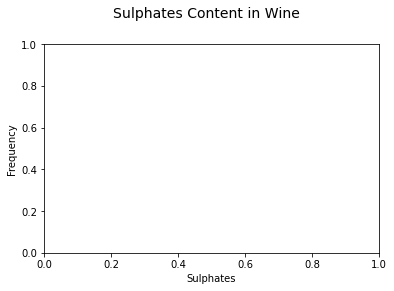

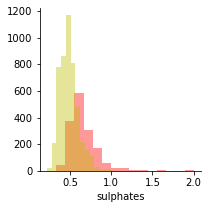

In [69]:
fig=plt.figure(figsize=(6,4))
title=fig.suptitle('Sulphates Content in Wine',fontsize=14)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Sulphates')
ax.set_ylabel('Frequency')

g=sns.FacetGrid(wines,hue='wine_type',palette={'red':'r','white':'y'})
g.map(sns.distplot,'sulphates',kde=False,bins=15,ax=ax)


Text(0, 0.5, 'Wine Alcohol %')

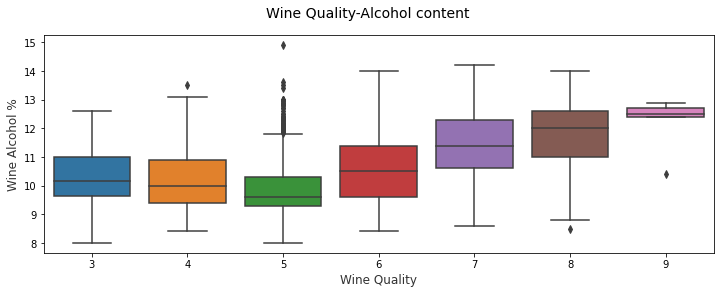

In [75]:
f, (ax)=plt.subplots(1,1,figsize=(12,4))
f.suptitle('Wine Quality-Alcohol content',fontsize=14)

sns.boxplot(x='quality',y='alcohol',data=wines,ax=ax)
ax.set_xlabel('Wine Quality',size=12,alpha=0.8)
ax.set_ylabel('Wine Alcohol %',size=12,alpha=0.8)

Text(0, 0.5, 'Wine Alcohol %')

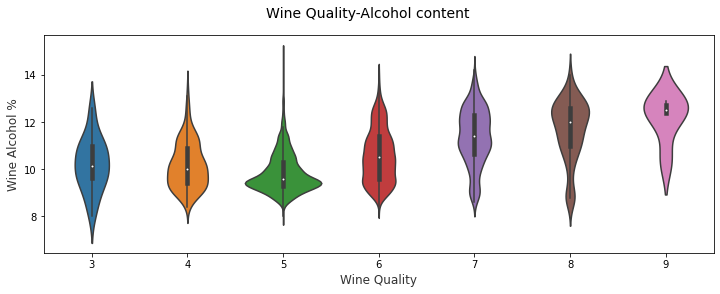

In [76]:
f, (ax)=plt.subplots(1,1,figsize=(12,4))
f.suptitle('Wine Quality-Alcohol content',fontsize=14)

sns.violinplot(x='quality',y='alcohol',data=wines,ax=ax)
ax.set_xlabel('Wine Quality',size=12,alpha=0.8)
ax.set_ylabel('Wine Alcohol %',size=12,alpha=0.8)

#### Visualizing Three Dimensions

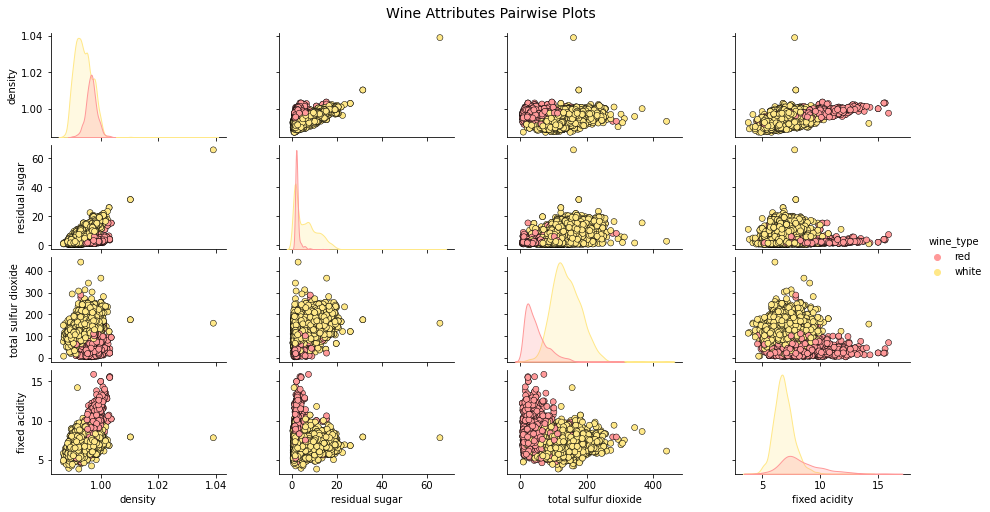

In [78]:
cols=['density','residual sugar','total sulfur dioxide','fixed acidity','wine_type']

pp=sns.pairplot(wines[cols],hue='wine_type',size=1.8,aspect=1.8,
               palette={'red':'#FF9999','white':'#FFE888'},
               plot_kws=dict(edgecolor='black',linewidth=0.5))

fig=pp.fig
fig.subplots_adjust(top=0.93,wspace=0.3)
t=fig.suptitle('Wine Attributes Pairwise Plots',fontsize=14)

#### Three Continuous Numeric Attributes

Text(0.5, 0, 'Alcohol')

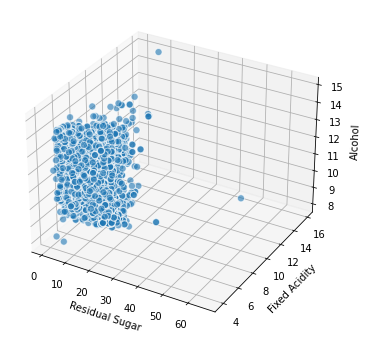

In [79]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

xs=wines['residual sugar']
ys=wines['fixed acidity']
zs=wines['alcohol']

ax.scatter(xs,ys,zs,s=50,alpha=0.6,edgecolor='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

Text(0.5, 1.05, 'Wine Alcohol content - Fixed Acidity - Residual Sugar')

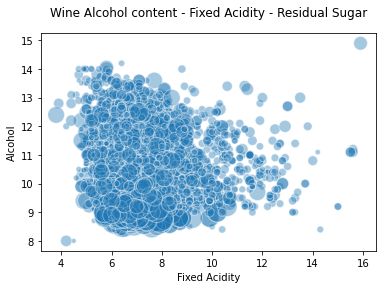

In [81]:
plt.scatter(wines['fixed acidity'],wines['alcohol'],s=wines['residual sugar']*25,alpha=0.4,edgecolor='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol content - Fixed Acidity - Residual Sugar',y=1.05)

#### Three Discrete Category Attributes

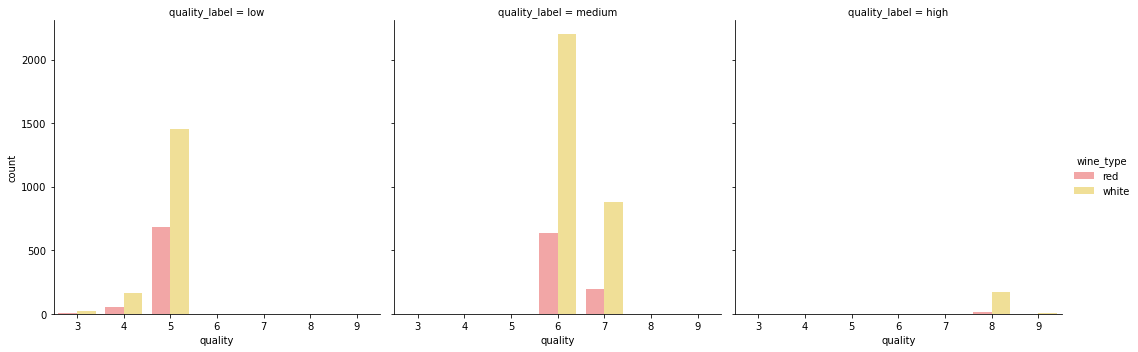

In [82]:
fc=sns.factorplot(x='quality',hue='wine_type',col='quality_label',data=wines,kind='count',
                 palette={'red':'#FF9999','white':'#FFE888'})

#### Mixed Attributes (Numeric & Categorical)

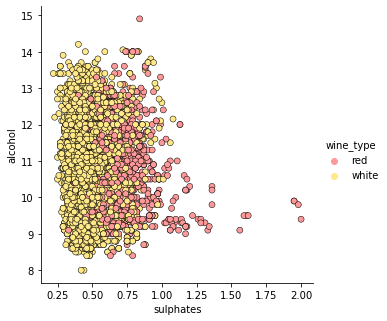

In [83]:
jp=sns.pairplot(wines,x_vars=['sulphates'],y_vars=['alcohol'],size=4.5,
               hue='wine_type',palette={'red':'#FF9999','white':'#FFE888'},
               plot_kws=dict(edgecolor='k',linewidth=0.5))

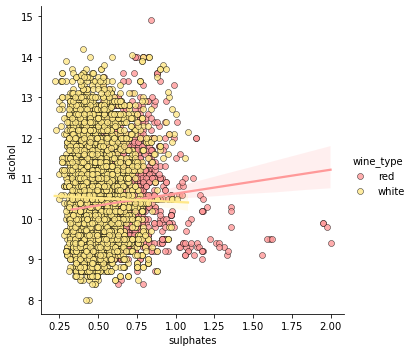

In [89]:
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

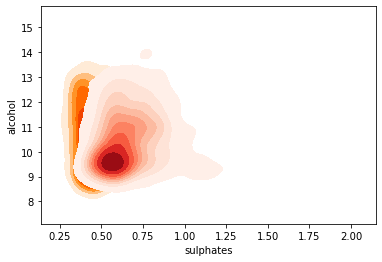

In [98]:
ax=sns.kdeplot(white_wine['sulphates'],white_wine['alcohol'],cmap='gist_heat_r',shade=True,shade_lowest=False)
ax=sns.kdeplot(red_wine['sulphates'],red_wine['alcohol'],cmap='Reds',shade=True,shade_lowest=False)

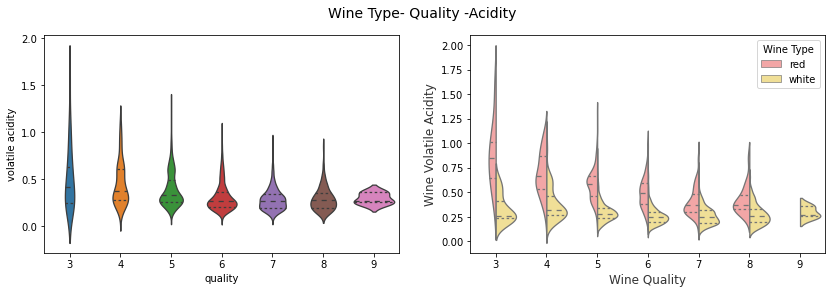

In [105]:
f, (ax1,ax2)= plt.subplots(1,2,figsize=(14,4))
f.suptitle('Wine Type- Quality -Acidity',fontsize=14)

sns.violinplot(x='quality',y='volatile acidity',
              data=wines,inner='quart',linewidth=1.3,ax=ax1)

ax.set_xlabel('Wine Quality',size=12,alpha=0.8)
ax.set_ylabel('Wine Volatile Acidity',size=12,alpha=0.8)

sns.violinplot(x='quality',y='volatile acidity',hue='wine_type',
              data=wines,split=True,inner="quart",linewidth=1.3,
              palette={'red':'#FF9999','white':'#FFE888'},ax=ax2)

ax2.set_xlabel('Wine Quality',size=12,alpha=0.8)
ax2.set_ylabel('Wine Volatile Acidity',size=12,alpha=0.8)

l=plt.legend(loc='upper right',title='Wine Type')

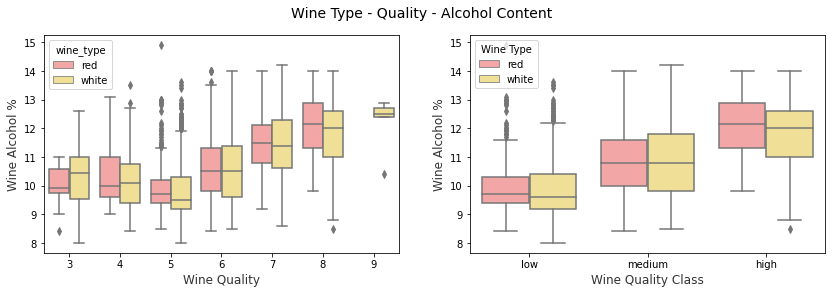

In [106]:
f, (ax1,ax2)=plt.subplots(1,2,figsize=(14,4))
f.suptitle('Wine Type - Quality - Alcohol Content',fontsize=14)

sns.boxplot(x='quality',y='alcohol',hue='wine_type',data=wines,palette={'red':'#FF9999','white':'#FFE888'},ax=ax1)

ax1.set_xlabel('Wine Quality',size=12,alpha=0.8)
ax1.set_ylabel('Wine Alcohol %',size=12,alpha=0.8)

sns.boxplot(x='quality_label',y='alcohol',hue='wine_type',data=wines,palette={'red':'#FF9999','white':'#FFE888'},ax=ax2)

ax2.set_xlabel('Wine Quality Class',size=12,alpha=0.8)
ax2.set_ylabel('Wine Alcohol %',size=12,alpha=0.8)

l=plt.legend(loc='best',title='Wine Type')

#### Visualizing Four Dimensions

Text(0.5, 0, 'Fixed Acidity')

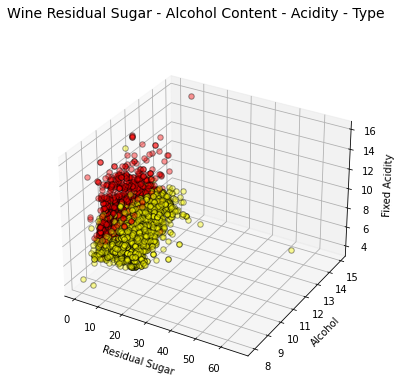

In [110]:
fig=plt.figure(figsize=(8,6))
t=fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type',fontsize=14)
ax=fig.add_subplot(111,projection='3d')

xs=list(wines['residual sugar'])
ys=list(wines['alcohol'])
zs=list(wines['fixed acidity'])

data_points=[(x,y,z)for x,y,z in zip(xs,ys,zs)]

colors=['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points,colors):
    x,y,z=data
    ax.scatter(x,y,z,alpha=0.4,c=color,edgecolors='black',s=30)
    
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5, 1.05, 'Wine Alcohol Content - Acidity')

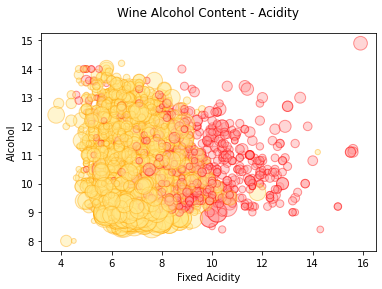

In [113]:
size=wines['residual sugar']*25
fill_colors=['#FF9999' if wt == 'red' else '#FFE888' for wt in  list(wines['wine_type'])]
edge_colors=['red' if wt == 'red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'],wines['alcohol'],s=size,alpha=0.4,color=fill_colors,edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Acidity',y=1.05)

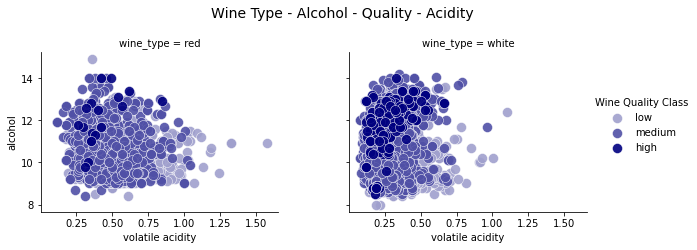

In [115]:
g=sns.FacetGrid(wines,col='wine_type',hue='quality_label',
               col_order=['red','white'],hue_order=['low','medium','high'],
               aspect=1.2, size=3.5, palette=sns.light_palette('navy',4)[1:])

g.map(plt.scatter,'volatile acidity','alcohol',alpha=0.9,edgecolor='white',linewidth=0.5,s=100)

fig=g.fig
fig.subplots_adjust(top=0.8,wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity',fontsize=14)
l=g.add_legend(title='Wine Quality Class')

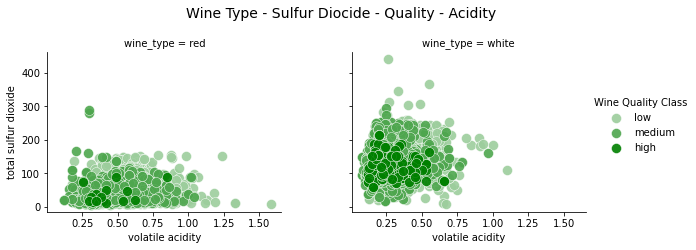

In [117]:
g=sns.FacetGrid(wines,col='wine_type',hue='quality_label',
               col_order=['red','white'],hue_order=['low','medium','high'],
               aspect=1.2, size=3.5, palette=sns.light_palette('green',4)[1:])

g.map(plt.scatter,'volatile acidity','total sulfur dioxide',alpha=0.9,edgecolor='white',linewidth=0.5,s=100)

fig=g.fig
fig.subplots_adjust(top=0.8,wspace=0.3)
fig.suptitle('Wine Type - Sulfur Diocide - Quality - Acidity',fontsize=14)
l=g.add_legend(title='Wine Quality Class')

#### Visualizing five Dimensions

Text(0.5, 0, 'Fixed Acidity')

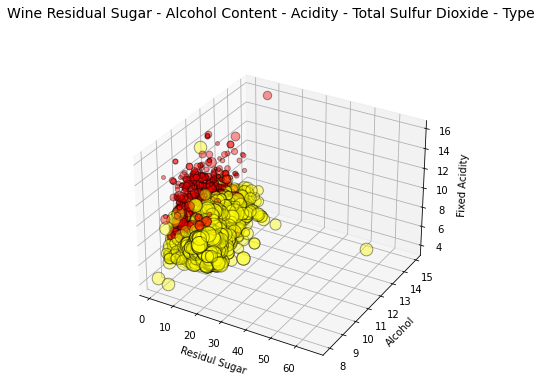

In [120]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
t=fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs=list(wines['residual sugar'])
ys=list(wines['alcohol'])
zs=list(wines['fixed acidity'])

data_points=[(x,y,z) for x,y,z in zip(xs,ys,zs)]

ss=list(wines['total sulfur dioxide'])

colors=['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data,color,size in zip(data_points,colors,ss):
    x, y, z = data
    ax.scatter(x,y,z, alpha=0.4, c=color, edgecolors='black', s=size)
    
ax.set_xlabel('Residul Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

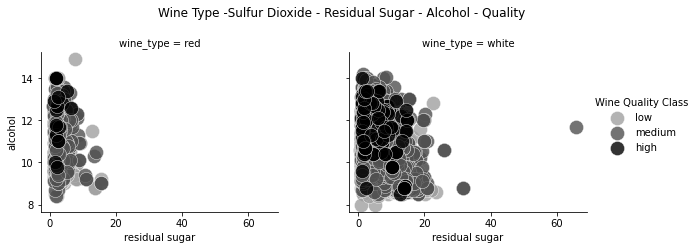

In [128]:
g=sns.FacetGrid(wines,col='wine_type', hue='quality_label', col_order=['red','white'], hue_order=['low','medium','high'],
               aspect=1.2, size=3.5, palette=sns.light_palette('black',4)[1:])

g.map(plt.scatter,'residual sugar','alcohol',alpha=0.8, edgecolor='white',linewidth=0.5, s=200)

fig=g.fig
fig.subplots_adjust(top=0.8,wspace=0.3)
fig.suptitle('Wine Type -Sulfur Dioxide - Residual Sugar - Alcohol - Quality')
l=g.add_legend(title='Wine Quality Class')

#### Visualizing Six Dimensions

Text(0.5, 0, 'Fixed Acidity')

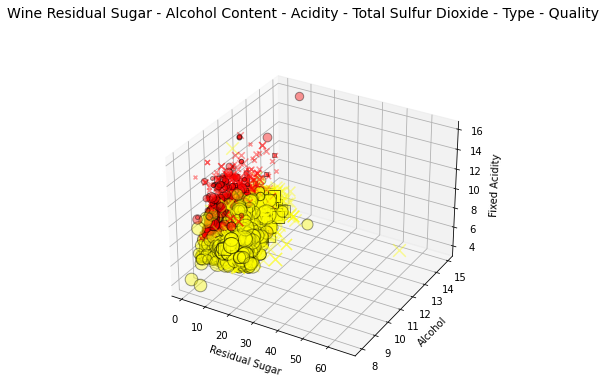

In [131]:
fig=plt.figure(figsize=(8,6))
t=fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality',fontsize=14)
ax=fig.add_subplot(111,projection='3d')

xs=list(wines['residual sugar'])
ys=list(wines['alcohol'])
zs=list(wines['fixed acidity'])

data_points=[(x,y,z) for x,y,z in zip(xs,ys,zs)]
ss=list(wines['total sulfur dioxide'])
colors=['red' if ws=='red' else 'yellow' for ws in list(wines['wine_type'])]
markers=[',' if q=='high' else 'x' if q=='medium' else 'o' for q in list(wines['quality_label'])]

for data,color,size,mark in zip(data_points,colors,ss,markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolor='black', s=size, marker=mark)
    
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

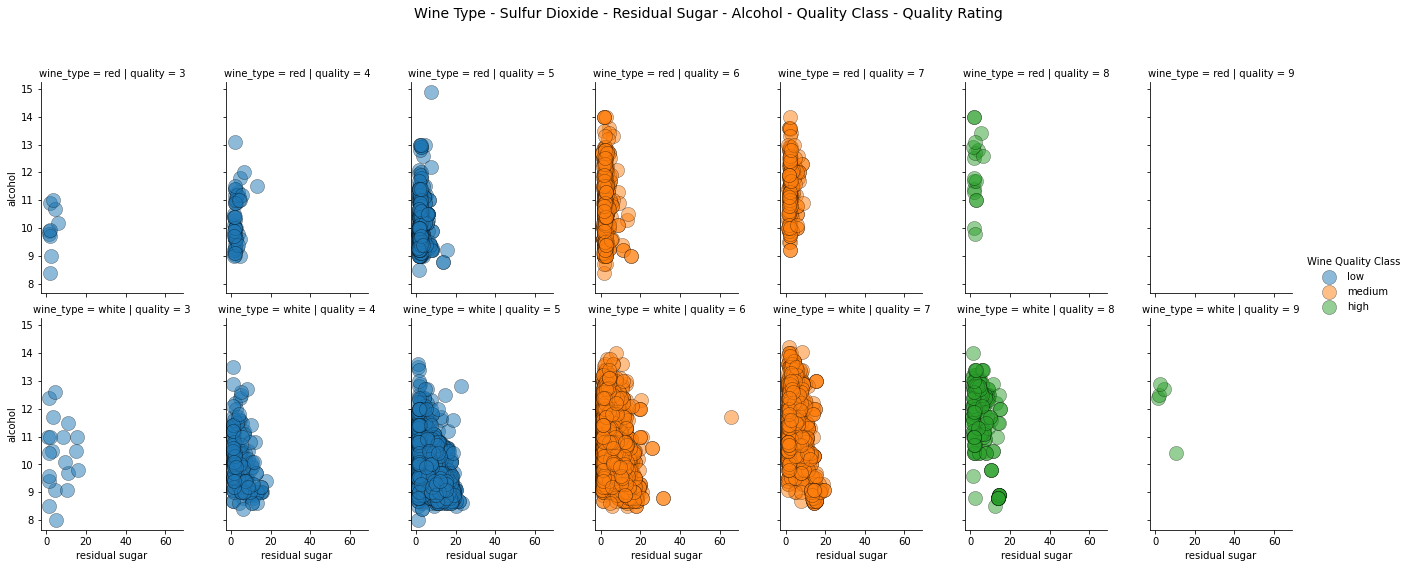

In [133]:
g= sns.FacetGrid(wines, row='wine_type', col='quality', hue='quality_label', size=4)
g.map(plt.scatter, 'residual sugar', 'alcohol', alpha=0.5, edgecolor='k', linewidth=0.5, s=200)

fig=g.fig
fig.set_size_inches(18,8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)

l=g.add_legend(title='Wine Quality Class')

In [ ]:
#end